# Import the required libraries/packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import the dataset

In [2]:
data = pd.read_csv('Documentaries.csv')
data.head()

,Title,Premiere,Runtime,Language
0,Three Songs for Benazir,24-Jan-22,22 min,Pashto
1,The Tinder Swindler,2-Feb-22,1 h 54 min,English
2,Downfall: The Case Against Boeing,18-Feb-22,1 h 29 min,English
3,11M: Terror in Madrid,23-Feb-22,1 h 32 min,Spanish
4,Surviving Paradise: A Family Tale,3-Mar-22,1 h 19 min,English


In [3]:
#checking for duplicates
data[data.duplicated()]

,Title,Premiere,Runtime,Language


In [4]:
#checking for null values in each column
data.isnull().sum()

Title       0
Premiere    0
Runtime     0
Language    0
dtype: int64

In [5]:
#checking the datatypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     59 non-null     object
 1   Premiere  59 non-null     object
 2   Runtime   59 non-null     object
 3   Language  59 non-null     object
dtypes: object(4)
memory usage: 2.0+ KB


# Converting the 'Premiere' column to a datetime

In [6]:
data['Premiere'] = pd.to_datetime(data['Premiere'])

In [7]:
 data['Premiere'].dt.year.unique()

array([2022], dtype=int64)

In [8]:
data['Premiere Month'] = data['Premiere'].dt.month

In [9]:
data['Premiere date'] =  data['Premiere'].dt.month

In [10]:
data.sort_values(by ='Premiere Month',inplace = True)

In [11]:
month = {1:'January',
        2:'February ',
        3:'March',
        4:'April',
        5:'May',
        6:'June',
        7:'July',
        8:'August',
        9:'September',
        10:'October',
        11:'November',
        12:'December',}

In [12]:
data['Premiere Month'] = data['Premiere Month'].map(month)

In [13]:
data.head()

,Title,Premiere,Runtime,Language,Premiere Month,Premiere date
0,Three Songs for Benazir,2022-01-24,22 min,Pashto,January,1
1,The Tinder Swindler,2022-02-02,1 h 54 min,English,February,2
2,Downfall: The Case Against Boeing,2022-02-18,1 h 29 min,English,February,2
3,11M: Terror in Madrid,2022-02-23,1 h 32 min,Spanish,February,2
4,Surviving Paradise: A Family Tale,2022-03-03,1 h 19 min,English,March,3


# Create a new column 'Runtime in Mins'

In [14]:
#create a function that calculates the total mins in each element
def minutes(runtime):
#split each element on space
    split = runtime.split(' ')
    total_mins = 0
    
    for dp in range(0,len(split),2):
        if split[dp + 1] == 'h':
            total_mins += int(split[dp])* 60
        elif split[dp + 1] == 'min':
            total_mins += int(split[dp])
    return total_mins 

In [15]:
#applying the function to a column in a dataframe
data['Runtime(mins)'] = data['Runtime'].apply(minutes)

In [16]:
data.head()

,Title,Premiere,Runtime,Language,Premiere Month,Premiere date,Runtime(mins)
0,Three Songs for Benazir,2022-01-24,22 min,Pashto,January,1,22
1,The Tinder Swindler,2022-02-02,1 h 54 min,English,February,2,114
2,Downfall: The Case Against Boeing,2022-02-18,1 h 29 min,English,February,2,89
3,11M: Terror in Madrid,2022-02-23,1 h 32 min,Spanish,February,2,92
4,Surviving Paradise: A Family Tale,2022-03-03,1 h 19 min,English,March,3,79


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Title           59 non-null     object        
 1   Premiere        59 non-null     datetime64[ns]
 2   Runtime         59 non-null     object        
 3   Language        59 non-null     object        
 4   Premiere Month  59 non-null     object        
 5   Premiere date   59 non-null     int64         
 6   Runtime(mins)   59 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 3.7+ KB


In [18]:
#Sorting the data in a descending order(from the highest mins to the lowest) #OPTIONAL
# data.sort_values(by ='Runtime(mins)', ascending = False, inplace = True)

In [19]:
data.head()

,Title,Premiere,Runtime,Language,Premiere Month,Premiere date,Runtime(mins)
0,Three Songs for Benazir,2022-01-24,22 min,Pashto,January,1,22
1,The Tinder Swindler,2022-02-02,1 h 54 min,English,February,2,114
2,Downfall: The Case Against Boeing,2022-02-18,1 h 29 min,English,February,2,89
3,11M: Terror in Madrid,2022-02-23,1 h 32 min,Spanish,February,2,92
4,Surviving Paradise: A Family Tale,2022-03-03,1 h 19 min,English,March,3,79


In [20]:
#set the premiere as the index
data.set_index('Premiere',inplace = True)

In [21]:
data.head()

,Title,Runtime,Language,Premiere Month,Premiere date,Runtime(mins)
Premiere,,,,,,
2022-01-24,Three Songs for Benazir,22 min,Pashto,January,1,22
2022-02-02,The Tinder Swindler,1 h 54 min,English,February,2,114
2022-02-18,Downfall: The Case Against Boeing,1 h 29 min,English,February,2,89
2022-02-23,11M: Terror in Madrid,1 h 32 min,Spanish,February,2,92
2022-03-03,Surviving Paradise: A Family Tale,1 h 19 min,English,March,3,79


# Analytical Questions
## Descriptive Statistics

### What is the average runtime of documentaries in the dataset?

In [22]:
#calculating the mean
avg_mins = data['Runtime(mins)'].mean()
avg_mins

88.55932203389831

In [23]:
#create a function that calculates the hrs and mins.
def mean_time():
    hr = int((avg_mins - (avg_mins %60))/60)
    mins = int(avg_mins % 60)
    
    print (f"The average runtime of the documentaries is :{hr}hr {mins}mins")

In [24]:
mean_time()
# Answer = The average runtime of the documentaries is :1hr 28mins

The average runtime of the documentaries is :1hr 28mins


### What is the most common language used in documentaries?

In [25]:
df= data.copy()
df.head()

,Title,Runtime,Language,Premiere Month,Premiere date,Runtime(mins)
Premiere,,,,,,
2022-01-24,Three Songs for Benazir,22 min,Pashto,January,1,22
2022-02-02,The Tinder Swindler,1 h 54 min,English,February,2,114
2022-02-18,Downfall: The Case Against Boeing,1 h 29 min,English,February,2,89
2022-02-23,11M: Terror in Madrid,1 h 32 min,Spanish,February,2,92
2022-03-03,Surviving Paradise: A Family Tale,1 h 19 min,English,March,3,79


In [26]:
lang_grouped = df.groupby('Language').count().sort_values( by = 'Title', ascending = False)
lang_grouped
# Answer = English is the most common language used in the documentaries

,Title,Runtime,Premiere Month,Premiere date,Runtime(mins)
Language,,,,,
English,43,43,43,43,43
Spanish,7,7,7,7,7
Japanese,2,2,2,2,2
French,1,1,1,1,1
German,1,1,1,1,1
Korean,1,1,1,1,1
Pashto,1,1,1,1,1
Portuguese,1,1,1,1,1
Tamil,1,1,1,1,1


### How many documentaries are there in total?

In [27]:
#To check how many documentaries there is in total,
#first: check for duplicates, if none,
#second: calculate the length of the dataset

data[data['Title'].duplicated()] # answer = NONE
len(data)
# Answer = There are 59 documentaries in total

59

## Temporal Analysis
### How has the number of documentaries premiered changed over the months in the year 2022?


In [28]:
#This requires a graphical representation
date_grouped = data.groupby('Premiere date').count()
date_grouped

,Title,Runtime,Language,Premiere Month,Runtime(mins)
Premiere date,,,,,
1,1,1,1,1,1
2,3,3,3,3,3
3,3,3,3,3,3
4,3,3,3,3,3
5,4,4,4,4,4
6,5,5,5,5,5
7,3,3,3,3,3
8,7,7,7,7,7
9,7,7,7,7,7


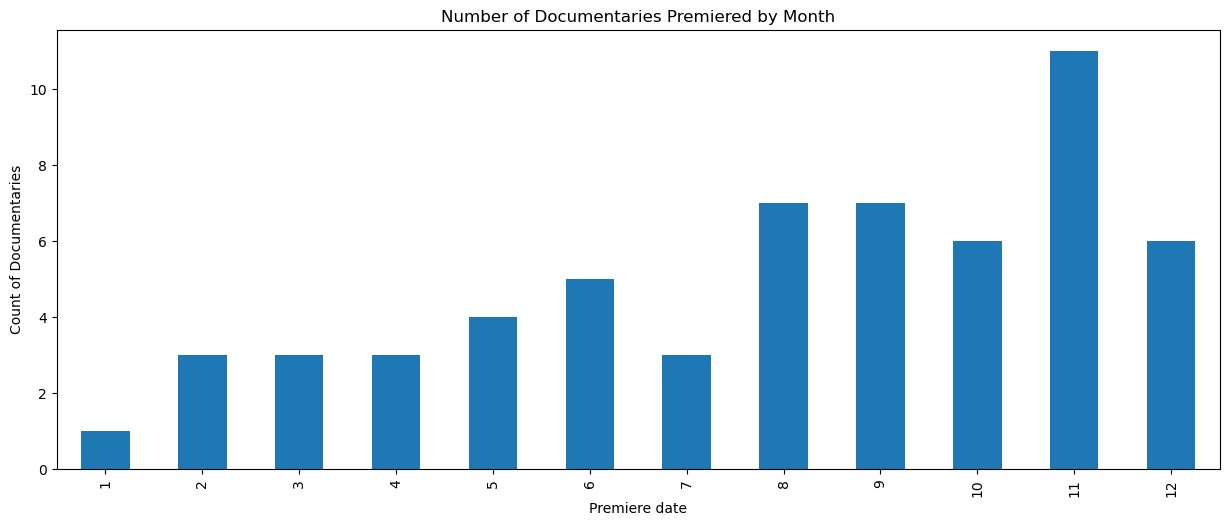

In [29]:
# plt.bar(date_grouped,np.arange(0, len(data['Title'])))
plt.figure(figsize=(15,5.7))
date_grouped['Title'].plot(kind = 'bar', title = 'Number of Documentaries Premiered by Month', ylabel= 'Count of Documentaries')
# date_grouped['Title'].plot(kind = 'line',color = 'orange'))
plt.show()

#Answer = 

### Is there a particular season or month when more documentaries tend to premiere?

In [35]:
#Answer = Yes and that is 'November' because it is the month with the highest premiere of 11 documentaries in the year 2022
date_grouped.max()['Premiere Month']

11

### Which languages are represented in the dataset, and what is the distribution of documentaries across these languages?

In [37]:
df.head()

,Title,Runtime,Language,Premiere Month,Premiere date,Runtime(mins)
Premiere,,,,,,
2022-01-24,Three Songs for Benazir,22 min,Pashto,January,1,22
2022-02-02,The Tinder Swindler,1 h 54 min,English,February,2,114
2022-02-18,Downfall: The Case Against Boeing,1 h 29 min,English,February,2,89
2022-02-23,11M: Terror in Madrid,1 h 32 min,Spanish,February,2,92
2022-03-03,Surviving Paradise: A Family Tale,1 h 19 min,English,March,3,79


In [42]:
#Displaying unique languages in the dataset
df['Language'].unique()

array(['Pashto', 'English', 'Spanish', 'Korean', 'German', 'Japanese',
       'French', 'Thai', 'Portuguese', 'Tamil'], dtype=object)

In [43]:
#There is a total of 10 unique languages in the dataset
len(df['Language'].unique())

10

### Distribution of documentaries across these languages?

In [64]:
lang_grouped = df.groupby('Language').count().sort_values(by = 'Title',ascending = False)
lang_grouped

,Title,Runtime,Premiere Month,Premiere date,Runtime(mins)
Language,,,,,
English,43,43,43,43,43
Spanish,7,7,7,7,7
Japanese,2,2,2,2,2
French,1,1,1,1,1
German,1,1,1,1,1
Korean,1,1,1,1,1
Pashto,1,1,1,1,1
Portuguese,1,1,1,1,1
Tamil,1,1,1,1,1


In [78]:
# plt.style.available

<Axes: title={'center': 'Documentary Distribution By Language'}, xlabel='Languages', ylabel='Number of Documentary'>

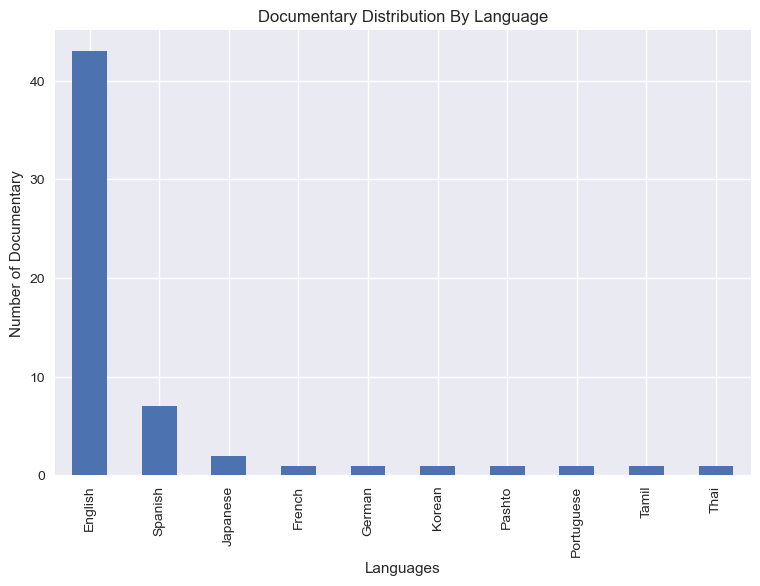

In [77]:
# using a bar chart to display the distribution of the documentaries across the unique languages
plt.style.use('seaborn-v0_8')
lang_grouped['Title'].plot(kind = 'bar',title='Documentary Distribution By Language',
                           ylabel='Number of Documentary',xlabel='Languages')

# Question : (1) Are there any trends in the use of specific languages over time? and how do I go about it?

### What is the title of the longest documentary in the dataset, and what is its runtime?

In [79]:
df.head()

,Title,Runtime,Language,Premiere Month,Premiere date,Runtime(mins)
Premiere,,,,,,
2022-01-24,Three Songs for Benazir,22 min,Pashto,January,1,22
2022-02-02,The Tinder Swindler,1 h 54 min,English,February,2,114
2022-02-18,Downfall: The Case Against Boeing,1 h 29 min,English,February,2,89
2022-02-23,11M: Terror in Madrid,1 h 32 min,Spanish,February,2,92
2022-03-03,Surviving Paradise: A Family Tale,1 h 19 min,English,March,3,79


In [89]:
#get the max of runtime 
df['Runtime(mins)'].max()

135

In [91]:
#compare the runtime column to the max time gotten, specifying the title and runtime
df[df['Runtime(mins)'] == df['Runtime(mins)'].max()][['Title','Runtime']]

,Title,Runtime
Premiere,,
2022-11-11,Is That Black Enough for You?!?,2 h 15 min


### Similarly, what is the title of the shortest documentary and its runtime?

In [92]:
#get the min of runtime 
df['Runtime(mins)'].min()

22

In [93]:
#compare the runtime column to the min time gotten, specifying the title and runtime
df[df['Runtime(mins)'] == df['Runtime(mins)'].min()][['Title','Runtime']]

,Title,Runtime
Premiere,,
2022-01-24,Three Songs for Benazir,22 min
